## About

In this notebook we prepare a simple solution for the [kaggle challenge on higgs.](https://inclass.kaggle.com/c/mlhep-2016-higgs-detection)

In [74]:
%matplotlib inline

In [75]:
import matplotlib.pyplot as plt

import pandas
import numpy

from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score

### Download data

In [76]:
!cd datasets; wget -O public_train_10000.root -nc --no-check-certificate https://2016.mlhep.yandex.net/data/higgs/public_train_10000.root

wget: /root/miniconda/envs/rep_py2/lib/libcrypto.so.1.0.0: no version information available (required by wget)
wget: /root/miniconda/envs/rep_py2/lib/libssl.so.1.0.0: no version information available (required by wget)
File `public_train_10000.root' already there; not retrieving.


In [77]:
!cd datasets; wget -O public_train_100000.root -nc --no-check-certificate https://2016.mlhep.yandex.net/data/higgs/public_train_100000.root

wget: /root/miniconda/envs/rep_py2/lib/libcrypto.so.1.0.0: no version information available (required by wget)
wget: /root/miniconda/envs/rep_py2/lib/libssl.so.1.0.0: no version information available (required by wget)
File `public_train_100000.root' already there; not retrieving.


In [78]:
# you can download training sample with 100000 available events
# uncomment the below row
# !cd datasets; wget -O public_train_100000.root -nc --no-check-certificate https://2016.mlhep.yandex.net/data/higgs/public_train_100000.root

In [79]:
!cd datasets; wget -O public_test.root -nc --no-check-certificate https://2016.mlhep.yandex.net/data/higgs/public_test.root

wget: /root/miniconda/envs/rep_py2/lib/libcrypto.so.1.0.0: no version information available (required by wget)
wget: /root/miniconda/envs/rep_py2/lib/libssl.so.1.0.0: no version information available (required by wget)
File `public_test.root' already there; not retrieving.


### Read the smallest part of training file and test file

In [80]:
import root_numpy
data = pandas.DataFrame(root_numpy.root2array('datasets/public_train_10000.root'))
data1 = pandas.DataFrame(root_numpy.root2array('datasets/public_train_100000.root'))
test = pandas.DataFrame(root_numpy.root2array('datasets/public_test.root'))

In [81]:
data.head()
data.shape
#pandas.options.display.max_columns = 40
#print data[1:3]
#print data1[1:3]

(10000, 30)

### Divide training data into 2 parts 
`train_test_split` function is used to divide into 2 parts to preserve quality overestimating.


In [82]:
test.head()

,event_id,lepton_pt,lepton_eta,lepton_phi,mem_pt,mem_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,jet2_pt,jet2_eta,jet2_phi,jet2_btag,jet3_pt,jet3_eta,jet3_phi,jet3_btag,jet4_pt,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1,58.814354,-1.223199,1.290717,26.435696,2.608772,68.413330,0.639561,-1.226549,1.000008,28.192644,1.319475,2.704676,0.000000,90.252411,-0.443325,-0.734594,1.999937,35.200653,-1.195189,1.767687,0.000000,72.190338,170.810608,78.644196,224.813538,95.737434,372.835388,469.654236
1,2,21.390781,-0.468277,-1.371404,57.185963,1.214130,118.127953,-0.113784,-2.182008,0.000000,107.238831,-1.082186,0.232456,2.000016,68.670891,0.110876,2.863325,0.000000,40.473949,0.965376,2.698023,1.000000,62.736309,215.426300,73.971413,211.729141,195.910385,310.480103,431.597137
2,3,58.570217,1.443092,0.105191,54.450954,-2.354347,26.443583,-1.911658,1.337635,0.000000,154.289459,-1.142575,-2.166013,0.999969,139.899277,0.307173,1.089414,2.000016,24.017288,-2.212247,-2.609508,0.000000,48.172768,163.506821,106.111038,260.643646,351.328644,638.053040,790.960815
3,4,70.469345,0.166176,-1.962429,38.138966,2.564890,42.678413,-1.256608,-0.276156,2.000000,42.376274,0.249604,-0.689569,0.000000,61.597656,-0.904709,1.914711,0.000000,37.422001,-0.007441,3.048725,2.000023,99.099815,158.532227,79.701500,169.550491,96.056900,305.073212,402.656067
4,5,113.456779,0.232503,2.941150,64.401146,1.125812,164.289139,-0.735258,-0.590741,1.999937,48.857182,-0.814078,3.020974,0.000000,32.992023,-0.362528,-2.159055,0.000000,37.717247,-0.943712,1.599526,2.000023,50.816051,200.099945,130.013855,187.637009,142.145920,433.032440,507.496399


### Define training features

Exclude `event_id`, `target` from the features set

In [83]:
#features = list(set(data.columns) - {'event_id', 'target'})
#features = list(set(data.columns))
features = data.columns
features

Index([u'event_id', u'target', u'lepton_pt', u'lepton_eta', u'lepton_phi',
       u'mem_pt', u'mem_phi', u'jet1_pt', u'jet1_eta', u'jet1_phi',
       u'jet1_btag', u'jet2_pt', u'jet2_eta', u'jet2_phi', u'jet2_btag',
       u'jet3_pt', u'jet3_eta', u'jet3_phi', u'jet3_btag', u'jet4_pt',
       u'jet4_eta', u'jet4_phi', u'jet4_btag', u'm_jj', u'm_jjj', u'm_lv',
       u'm_jlv', u'm_bb', u'm_wbb', u'm_wwbb'],
      dtype='object')

In [84]:
header = ['jet3_pt','jet3_eta','m_jjj','mem_phi','jet1_pt','jet4_phi','jet1_phi','jet2_eta','jet3_btag','m_jlv','m_wbb','jet4_pt','jet4_btag','jet2_pt','jet1_btag','m_jj','m_wwbb','jet2_phi','lepton_phi','m_bb','m_lv','jet4_eta','jet2_btag','lepton_pt','mem_pt','lepton_eta','jet3_phi','jet1_eta']

### Prepare high-level features for training

In [85]:
high_level_features = ['m_jj', 'm_jjj', 'm_jlv', 'm_wwbb', 'm_bb', 'm_wbb', 'm_lv']

### Plot histograms for each high-level feature

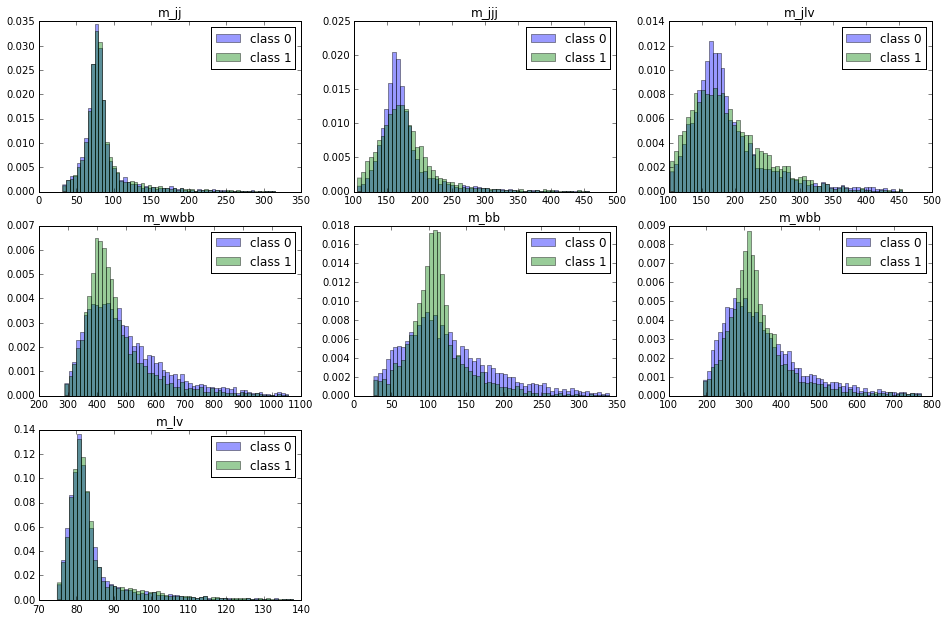

In [86]:
hist_params = {'normed': True, 'bins': 60, 'alpha': 0.4}
# create the figure
plt.figure(figsize=(16, 25))
for n, feature in enumerate(high_level_features):
    # add sub plot on our figure
    plt.subplot(len(features) // 5 + 1, 3, n+1)
    # define range for histograms by cutting 1% of data from both ends
    min_value, max_value = numpy.percentile(data[feature], [1, 99])
    plt.hist(data.ix[data.target.values == 0, feature].values, range=(min_value, max_value), 
             label='class 0', **hist_params)
    plt.hist(data.ix[data.target.values == 1, feature].values, range=(min_value, max_value), 
             label='class 1', **hist_params)
    plt.legend(loc='best')
    #plt.legend()
    plt.title(feature)

### Divide training data into 2 parts 
`train_test_split` function is used to divide into 2 parts to preserve quality overestimating.


In [87]:
training_data, validation_data = train_test_split(data, random_state=11, train_size=0.66)

### Simple knn from `sklearn` training

# from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=6)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(training_data[high_level_features], training_data.target)

In [88]:
#added by John
# predict validation sample (probability for each event)
proba = knn.predict_proba(validation_data[high_level_features])
# take probability to be 1 class to compute ROC AUC
roc_auc_score(validation_data.target, proba[:, 1])
#added end

0.72059171991203608

In [89]:
# predict validation sample (probability for each event)
proba = knn.predict_proba(validation_data[high_level_features])

In [90]:
proba

array([[ 0.375,  0.625],
       [ 0.375,  0.625],
       [ 0.875,  0.125],
       ..., 
       [ 0.75 ,  0.25 ],
       [ 0.625,  0.375],
       [ 0.75 ,  0.25 ]])

### Compute quality (ROC AUC) on the validation set (to prevent overestimating quality)

In [91]:
# take probability to be 1 class to compute ROC AUC
roc_auc_score(validation_data.target, proba[:, 1])

0.72059171991203608

## Prepare submission to kaggle

In [92]:
# predict test sample
kaggle_proba = knn.predict_proba(test[high_level_features])[:, 1]
kaggle_ids = test.event_id

In [93]:
from IPython.display import FileLink
def create_solution(ids, proba, filename='baseline.csv'):
    """saves predictions to file and provides a link for downloading """
    pandas.DataFrame({'event_id': ids, 'prediction': proba}).to_csv('datasets/{}'.format(filename), index=False)
    return FileLink('datasets/{}'.format(filename))
    
create_solution(kaggle_ids, kaggle_proba)

/notebooks/higgs_kaggle/datasets/baseline.csv